<a href="https://colab.research.google.com/github/jhlopesalves/Datacamp-Notebooks/blob/main/Python/Intro%20to%20Matplotlib/introduction_to_matplotlb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Matplotlib
This chapter introduces the Matplotlib visualization library and demonstrates how to use it with data.



In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Create the data directory if it doesn't exist
!mkdir -p data
# Download the files using wget
!wget -O data/seattle_weather.csv https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Matplotlib/data/seattle_weather.csv
!wget -O data/austin_weather.csv https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Matplotlib/data/austin_weather.csv
!wget -O data/climate_change.csv https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Matplotlib/data/climate_change.csv
!wget -O data/medals_by_country_2016.csv https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Matplotlib/data/medals_by_country_2016.csv
!wget -O data/summer2016.csv https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Matplotlib/data/summer2016.csv

In [83]:
# Load the dataset
seattle_weather = pd.read_csv("data/seattle_weather.csv")
austin_weather = pd.read_csv("data/austin_weather.csv")

In [84]:
# Convert the 'DATE' column to datetime objects
seattle_weather['DATE'] = pd.to_datetime(seattle_weather['DATE'], format='%m')
austin_weather['DATE'] = pd.to_datetime(austin_weather['DATE'], format='%m')

# Create the 'MONTH' column with month initials
seattle_weather['MONTH'] = seattle_weather['DATE'].dt.strftime('%b')
austin_weather['MONTH'] = austin_weather['DATE'].dt.strftime('%b')

In [85]:
# Group data by month and calculate the mean precipitation
# .reindex() is used to ensure the months are in chronological order on the plot
seattle_monthly_avg = seattle_weather.groupby("MONTH")["MLY-PRCP-NORMAL"].mean().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# This line does the same process for the 'austin_weather' DataFrame
austin_monthly_avg = austin_weather.groupby("MONTH")["MLY-PRCP-NORMAL"].mean().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

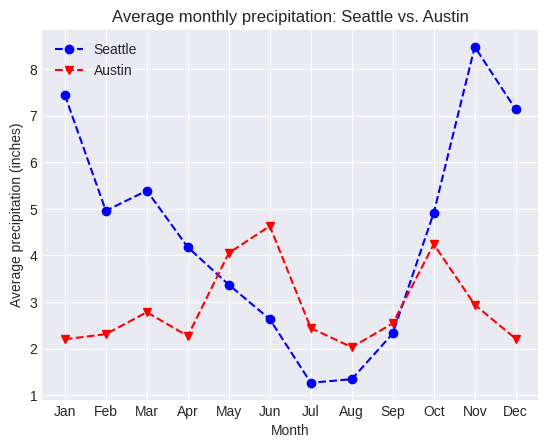

In [86]:
# Set default style
plt.style.use("seaborn-v0_8-darkgrid")

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot the monthly average precipitation
ax.plot(seattle_monthly_avg.index, seattle_monthly_avg.values, label='Seattle', color='b', marker='o', linestyle='--')

ax.plot(austin_monthly_avg.index, austin_monthly_avg.values, label='Austin', color='r', marker='v', linestyle='--')

# Add labels and title
ax.set_xlabel("Month")
ax.set_ylabel("Average precipitation (inches)")
ax.set_title("Average monthly precipitation: Seattle vs. Austin")
ax.legend()

# Call the show function
plt.show()

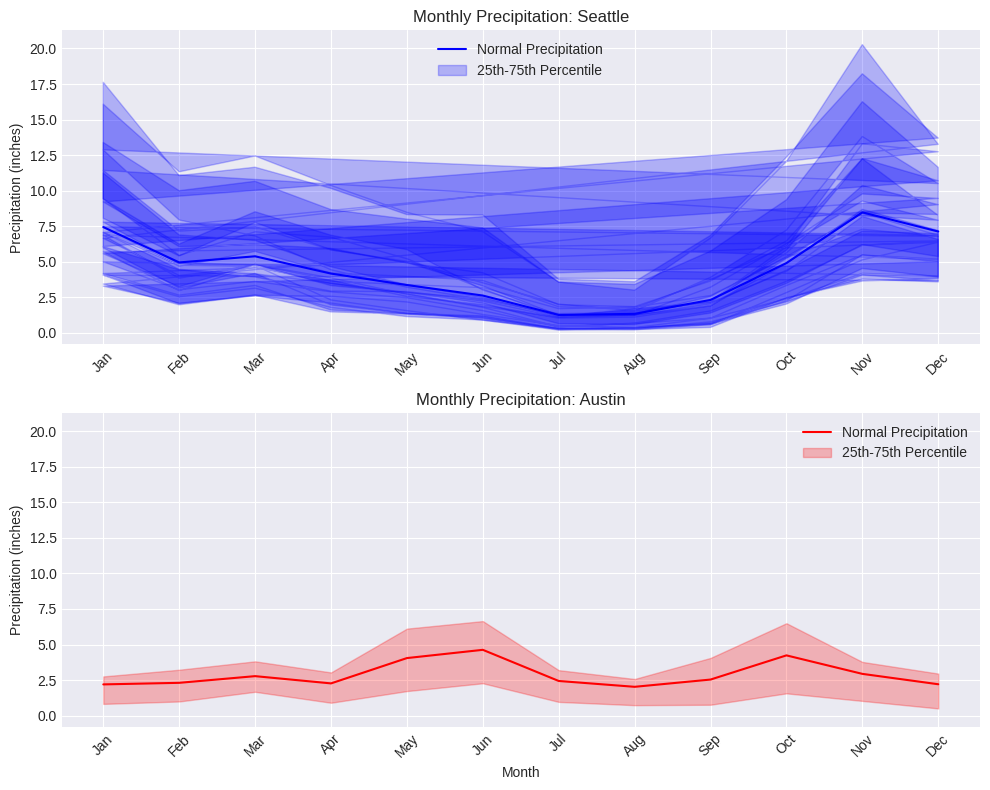

In [87]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
# plt.subplots() is a function that returns a figure and an array of axes objects.
# We specify 2 rows and 1 column for the layout of the plots.
# sharey=True ensures that both subplots share the same y-axis scale.
# figsize=(10, 8) sets the size of the figure in inches.
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(10, 8))

# Plot Seattle precipitation data in the top axes (ax[0])
# ax[0].plot() plots the line for normal precipitation.
# seattle_monthly_avg.index provides the x-values (months).
# seattle_monthly_avg.values provides the y-values (average precipitation).
# color='b' sets the line color to blue.
# label='Normal Precipitation' sets the label for the legend.
ax[0].plot(seattle_monthly_avg.index, seattle_monthly_avg.values, color='b', label='Normal Precipitation')
# ax[0].fill_between() fills the area between two horizontal curves.
# label='25th-75th Percentile' sets the label for the legend.
# This visualizes the interquartile range (IQR), a measure of statistical dispersion.
ax[0].fill_between(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-25PCTL'], seattle_weather['MLY-PRCP-75PCTL'], color='b', alpha=0.25, label='25th-75th Percentile')
ax[0].set_ylabel("Precipitation (inches)")
ax[0].set_title("Monthly Precipitation: Seattle")
ax[0].legend()
# ax[0].tick_params() customizes the ticks.
# axis='x' specifies the x-axis.
# rotation=45 rotates the x-axis labels by 45 degrees for better readability, especially with longer labels.
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Plot Austin precipitation data in the bottom axes (ax[1])
# This follows the same logic as the Seattle plot, but for Austin data.
ax[1].plot(austin_monthly_avg.index, austin_monthly_avg.values, color='r', label='Normal Precipitation')
ax[1].fill_between(austin_weather['MONTH'], austin_weather['MLY-PRCP-25PCTL'], austin_weather['MLY-PRCP-75PCTL'], color='r', alpha=0.25, label='25th-75th Percentile')
# ax[1].set_xlabel() sets the label for the x-axis (only needed for the bottom plot since the x-axis is shared).
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Precipitation (inches)")
ax[1].set_title("Monthly Precipitation: Austin")
ax[1].legend()
# ax[1].tick_params() rotates the x-axis labels.
ax[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# plt.tight_layout() automatically adjusts the subplot parameters to give a tight layout.
# This prevents labels and titles from overlapping.
plt.tight_layout()
plt.show()

## Plotting time-series
Time series data is data that is recorded. Visualizing this type of data helps clarify trends and illuminates relationships between data.

In [88]:
# Load the 'climate change' dataset for the Time Series
climate_change = pd.read_csv('data/climate_change.csv', parse_dates=['date'], index_col='date')

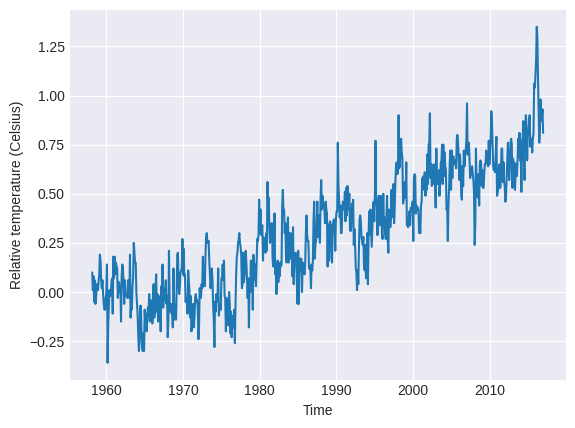

In [89]:
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')
# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

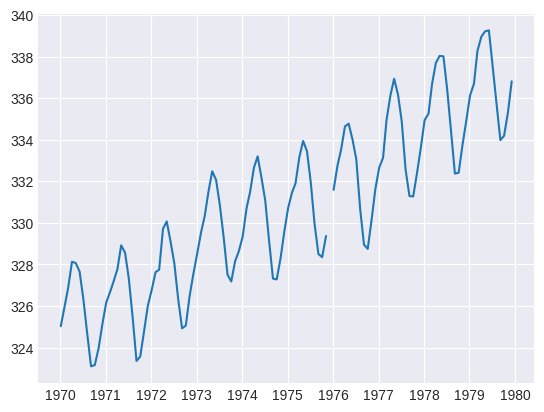

In [90]:
# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]
# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

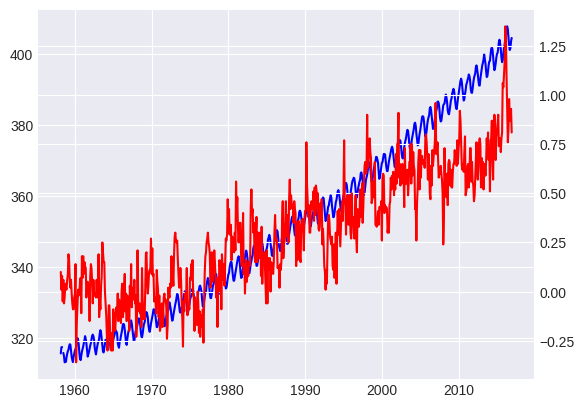

In [91]:
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change["co2"], color='blue')
# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()
# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change["relative_temp"], color='red')

plt.show()

In [92]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

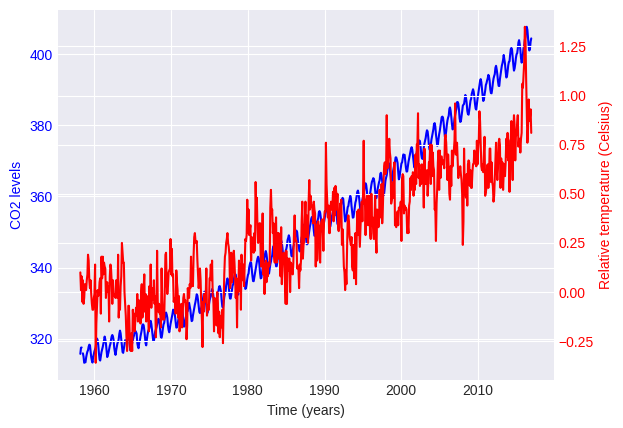

In [93]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(axes=ax, x=climate_change.index, y=climate_change["co2"], color="blue", xlabel="Time (years)", ylabel="CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(axes=ax2, x=climate_change.index, y=climate_change["relative_temp"], color="red", xlabel="Time (years)", ylabel="Relative temperature (Celsius)")

plt.show()

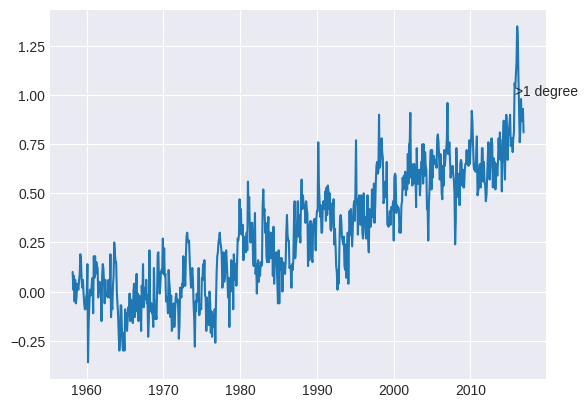

In [94]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change["relative_temp"])
# Annotate the date at which temperatures exceeded 1 degree
ax.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1))

plt.show()

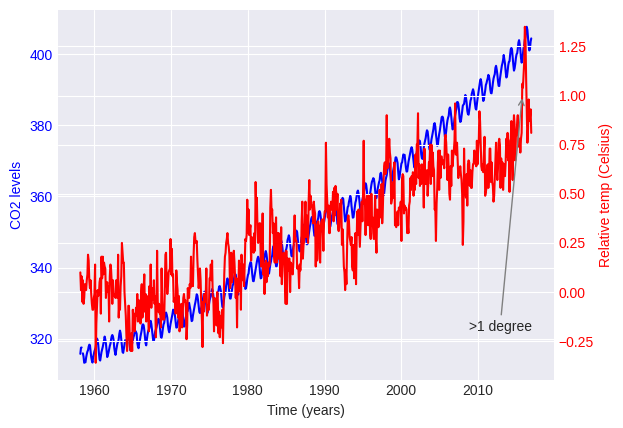

In [95]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()

## Quantitative comparisons and statistical visualizations
Visualizations can be used to compare data in a quantitative manner. This chapter explains several methods for quantitative visualizations.

### Bar chart
Bar charts visualize data that is organized according to categories as a series of bars, where the height of each bar represents the values of the data in this category.

For example, in this exercise, you will visualize the number of gold medals won by each country in the provided medals DataFrame. The DataFrame contains the countries as the index, and a column called "Gold" that contains the number of gold medals won by each country, according to their rows.

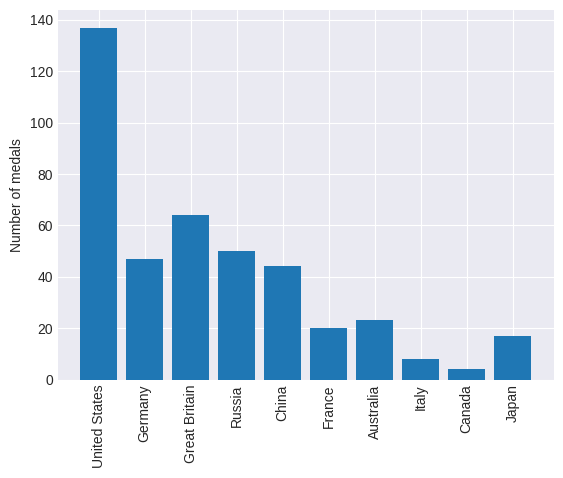

In [96]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals["Gold"])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()

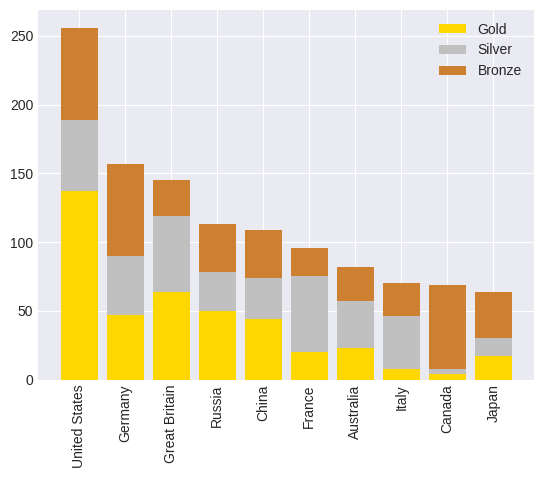

In [104]:
fig, ax = plt.subplots()

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals["Gold"], label="Gold", color='#FFD700') # Gold color

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label="Silver", color='#C0C0C0') # Silver color


# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"] + medals["Silver"], label="Bronze", color='#CD7F32') # Bronze color

ax.set_xticklabels(medals.index, rotation=90)

# Display the legend
ax.legend()

plt.show()

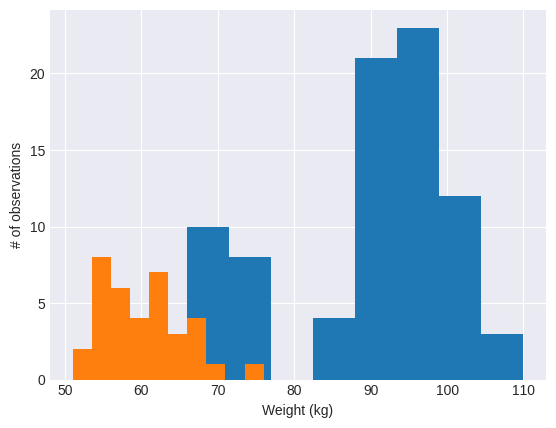

In [105]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (kg)")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()